In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#dataset loading
dataset = pd.read_csv("C:/Users/avish/Desktop/Sem 8/Final Project/Heart_Disease_Prediction/CVD/data/heart.csv")

EDA

In [3]:
print("The shape of the data is: " ,dataset.shape)
dataset.head() #the first five rows of the dataset

The shape of the data is:  (1025, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
# get the descriptive statistics of the dataset
dataset.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [5]:
print("The dataset has the following types of parameters\n",dataset.dtypes)

The dataset has the following types of parameters
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [6]:
#check for the missing values in the dataset
print("How many missing values are there in the dataset?\n",dataset.isnull().sum())

How many missing values are there in the dataset?
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Data Dictionary
# age in years
# sex 1-male, 0-female
# cp - chest pain 0,1,2,3
# trestbps - resting blood pressure in mm Hg
# chol - cholestrol in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
            # 1 -true, 0 -false
# restecg - resting ECG 0,1,2
# thalach - maximum heart rate achieved 
# exang - exercise induced angina 1-yes, 0-no
# oldpeak - ST depression induced by exercise relative to rest
# slope - slope of the peak exercise ST segment 0,1,2
# ca - number of major vessels 0,1,2,3
# thal
            # 0 = error
            # 1 = fixed defect
            # 2 = normal
            # 3 = reversable defect
# target 0-no disease, 1-disease

In [8]:
# dropping the wrong ca vlaues and error values from thal
dataset = dataset[dataset['ca']<4]
dataset = dataset[dataset['thal']>0]
print(f'The length of the data row now is {len(dataset)} instead of 1025')

The length of the data row now is 1000 instead of 1025


In [9]:
 # renaming the feature names to full medical name 
dataset = dataset.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [10]:
print(dataset.dtypes)

age                            int64
sex                            int64
chest_pain_type                int64
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar            int64
resting_electrocardiogram      int64
max_heart_rate_achieved        int64
exercise_induced_angina        int64
st_depression                float64
st_slope                       int64
num_major_vessels              int64
thalassemia                    int64
target                         int64
dtype: object


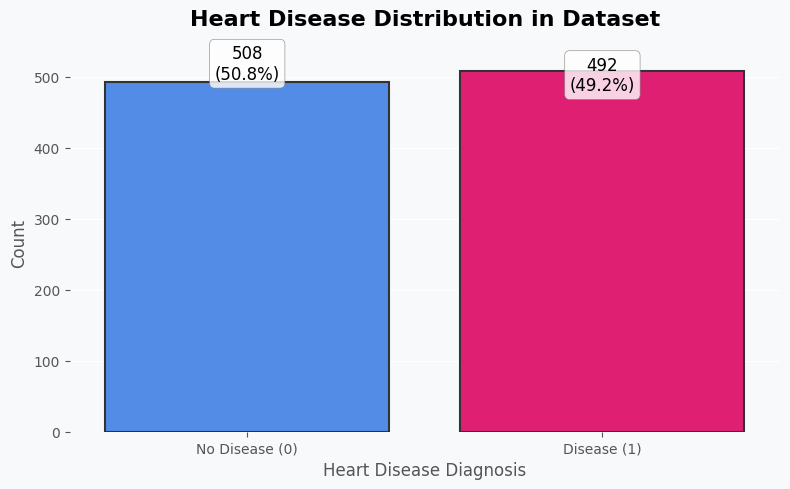

In [11]:
# target distribution

# Set custom style (compatible with all matplotlib versions)
plt.style.use('ggplot')  

# Custom settings
custom_palette = ['#3a86ff', '#ff006e']  
background_color = '#f8f9fa'  

# Create figure
plt.figure(figsize=(8, 5), facecolor=background_color, dpi=100)
ax = plt.gca()
ax.set_facecolor(background_color)

# Calculate statistics
total = len(dataset)
target_counts = dataset['target'].value_counts()
percentages = (target_counts/total)*100

# Create countplot 
sns.countplot(x='target', data=dataset, hue='target',  
              palette=custom_palette, 
              edgecolor='.2', 
              linewidth=1.5,
              legend=False)  

# Annotate bars
for i, (count, pct) in enumerate(zip(target_counts, percentages)):
    ax.text(i, count + 10, 
            f'{count}\n({pct:.1f}%)', 
            ha='center', 
            va='center',
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.3'))

# Customize plot
plt.title('Heart Disease Distribution in Dataset', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Heart Disease Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])

# Remove spines and adjust layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [12]:
# categorizing data types
# Numerical Features (Continuous)
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Categorical (Binary) - Features with exactly 2 classes
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']  

# Categorical (Nominal) - Features with >2 non-ordinal classes
nom_feats = ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']

# Combined Categorical Features
cat_feats = nom_feats + bin_feats

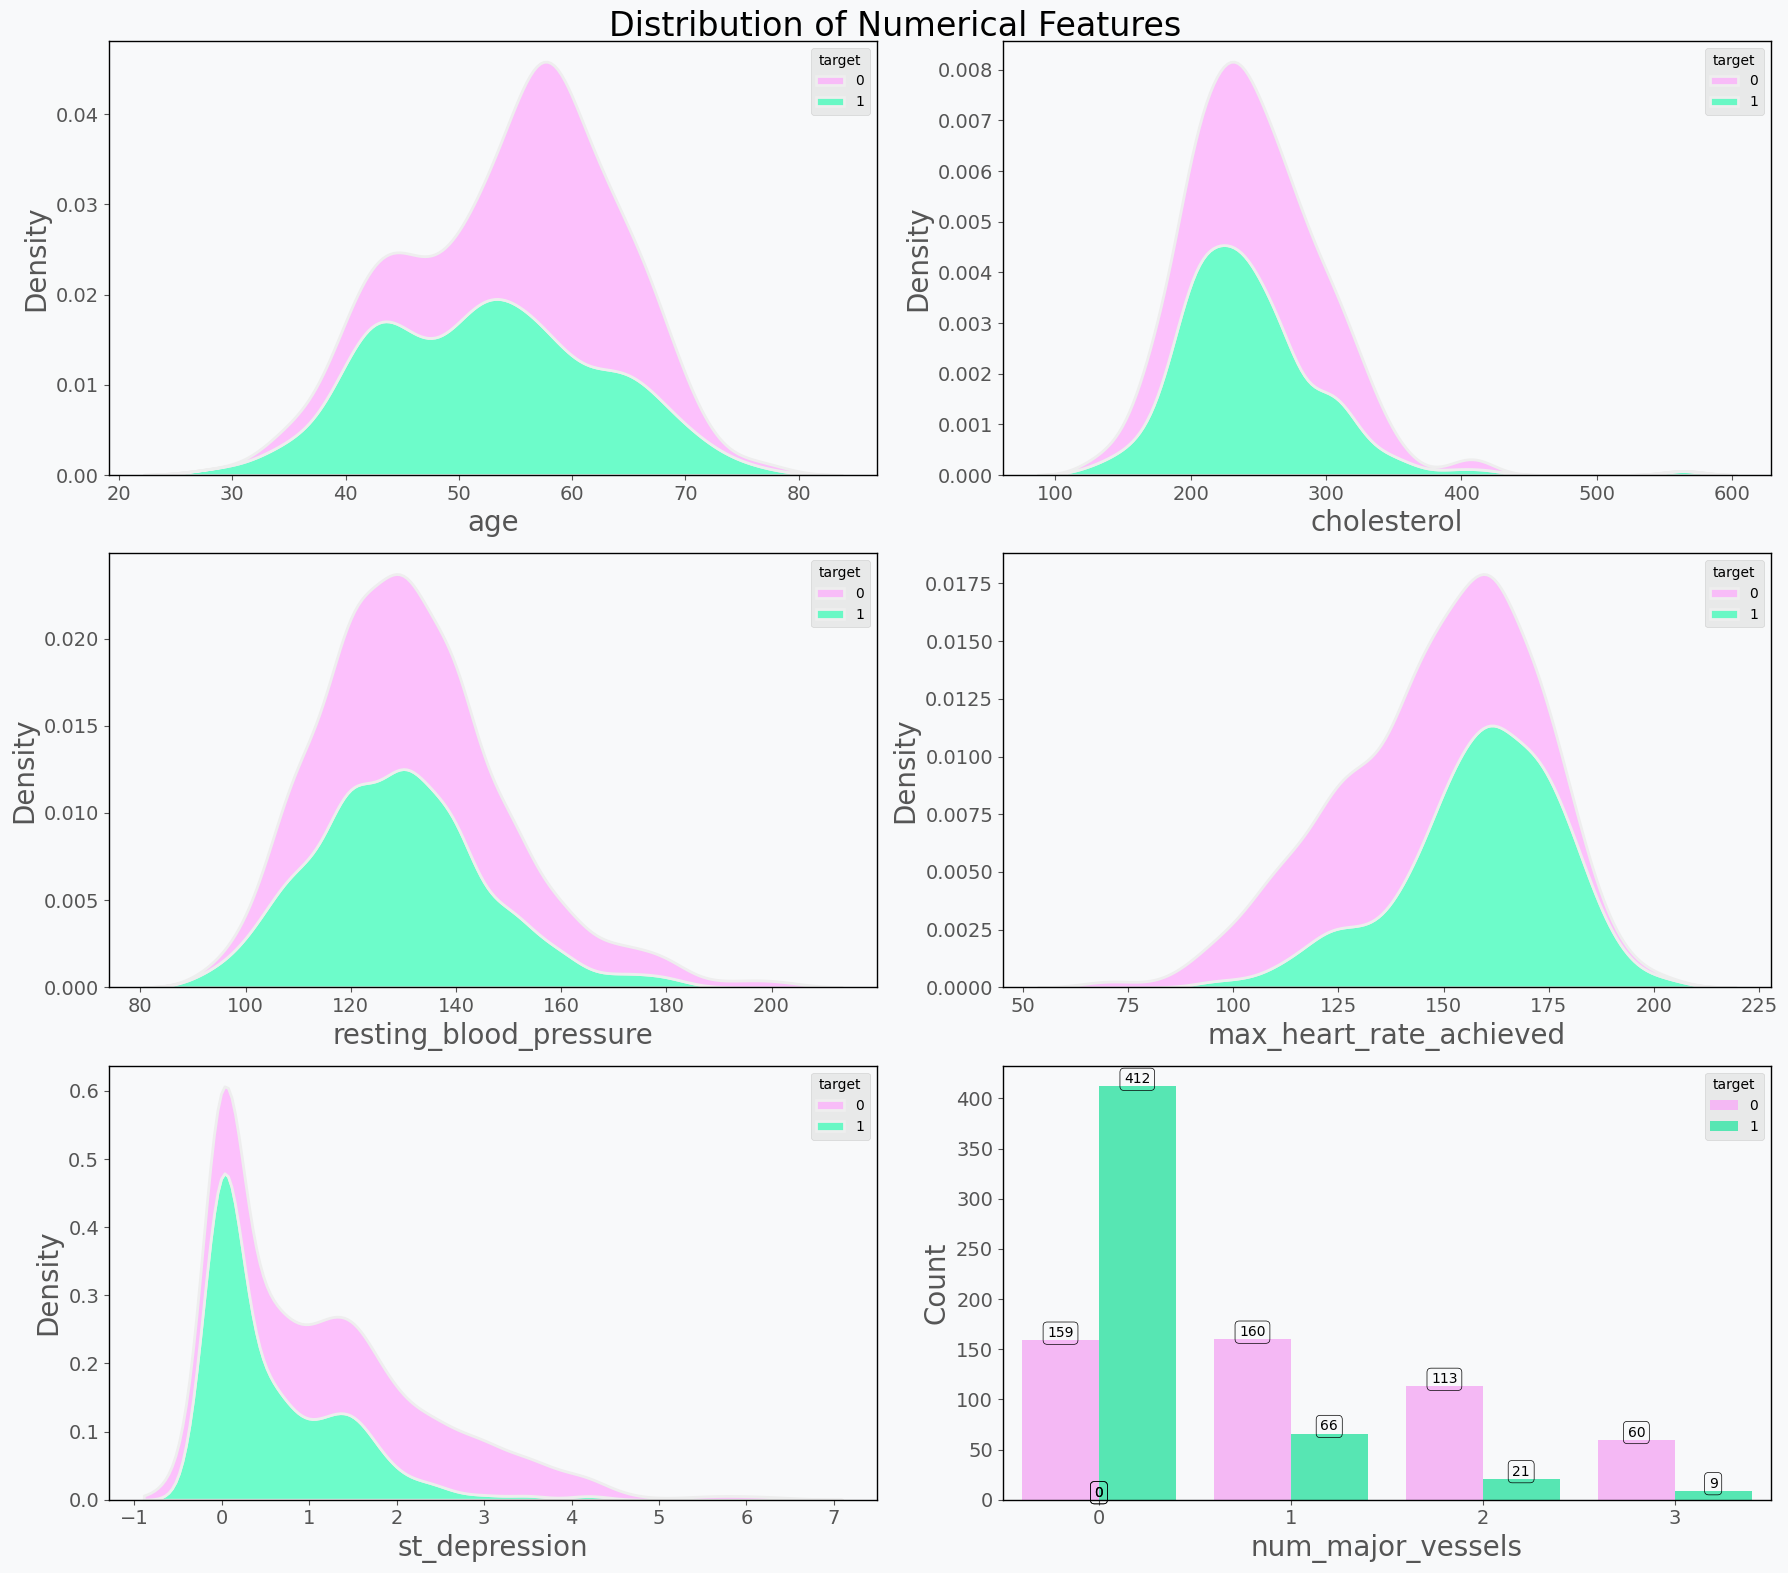

In [13]:
# density plots
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

# Numerical features (including num_major_vessels as requested)
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Setup subplots
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L/ncol))
fig, axes = plt.subplots(nrow, ncol, figsize=(18, 16), facecolor=background_color)
fig.subplots_adjust(top=0.92)

# Plot each feature
for i, col in enumerate(num_feats):
    ax = axes.flatten()[i]
    ax.set_facecolor(background_color)
    
    if col == 'num_major_vessels':
        # Bar plot for vessel count
        sns.countplot(data=dataset, x=col, hue="target", palette=mypal[1::4], ax=ax)
        
        # Add count labels
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, 
                    '{:1.0f}'.format(height), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', 
                             boxstyle='round', linewidth=0.5))
    else:
        # KDE plot for continuous features
        sns.kdeplot(data=dataset, x=col, hue="target", 
                    multiple="stack", palette=mypal[1::4],
                    ax=ax, linewidth=2)
    
    # Consistent formatting
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("Density" if col != 'num_major_vessels' else "Count", fontsize=20)
    ax.tick_params(labelsize=14)
    
    # Borders as in original (no grid)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Remove empty subplots if any
for j in range(i+1, nrow*ncol):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout()
plt.show()

<Figure size 2400x2400 with 0 Axes>

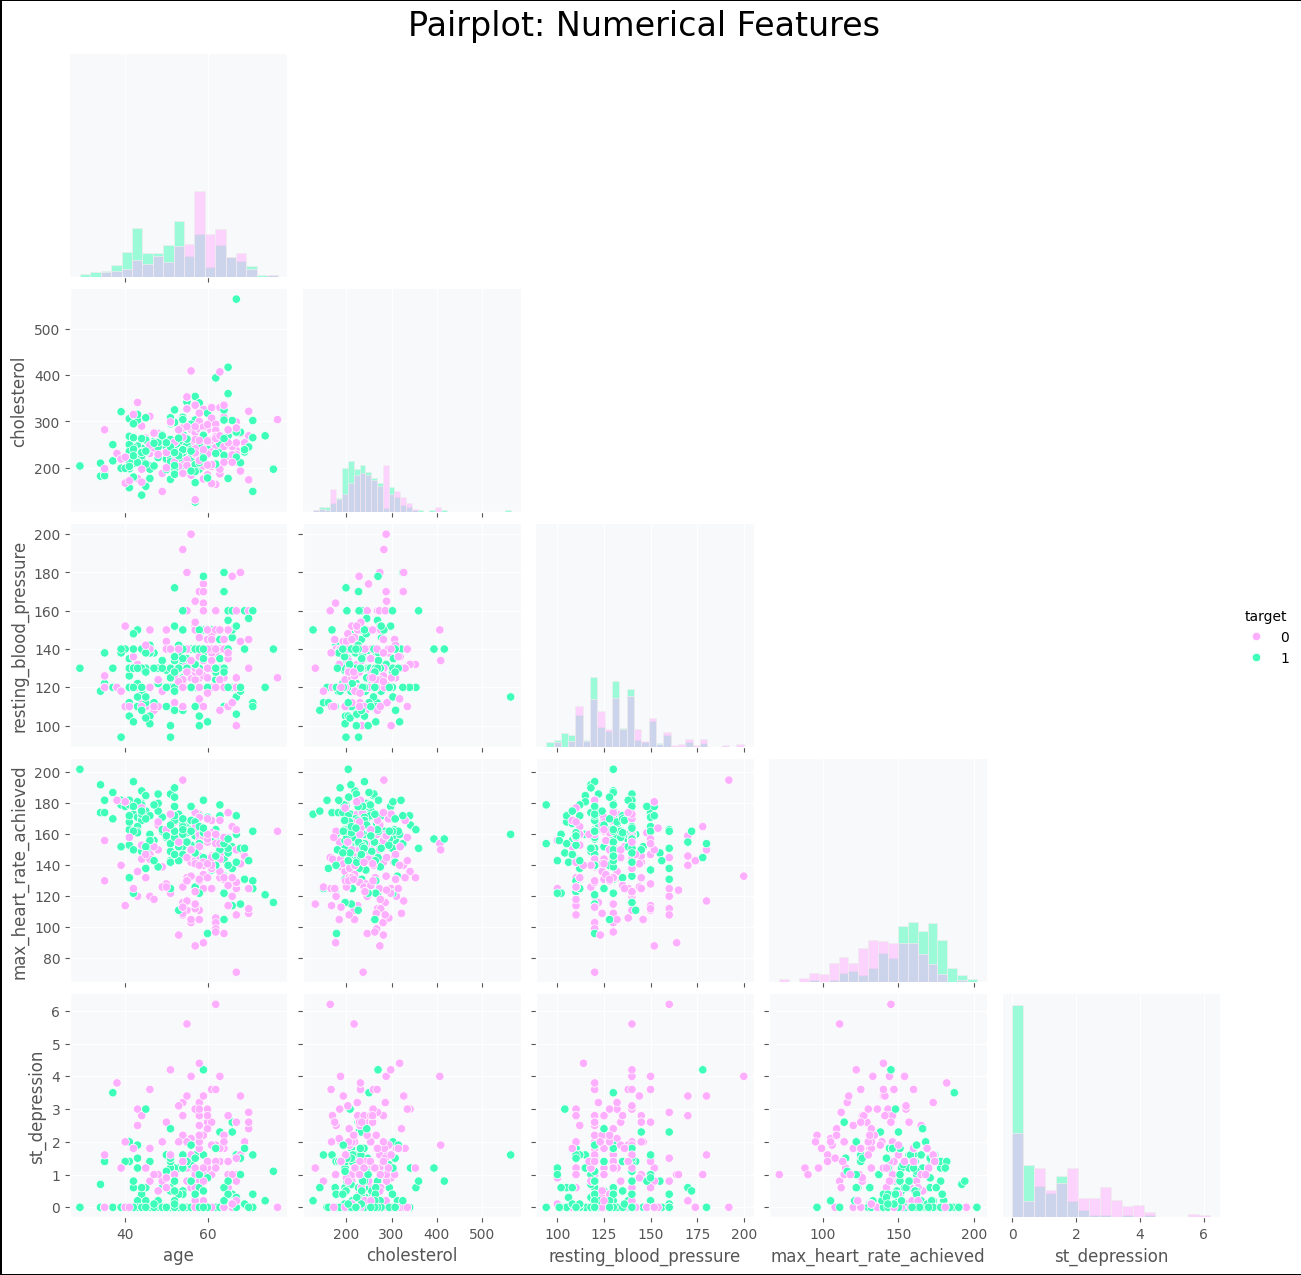

In [14]:
# pairplot numerical features
# Numerical features and target
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'target']

# Subset dataset
data = dataset[num_feats]

# Create pairplot
plt.figure(figsize=(24,24), facecolor=background_color)
g = sns.pairplot(data, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4])

# Set background color for each axis
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_facecolor(background_color)

# Add border around the entire figure
g.figure.patch.set_edgecolor('black')
g.figure.patch.set_linewidth(2)

# Set title
plt.suptitle('Pairplot: Numerical Features', fontsize=24, y=1.02)

# Save the plot
plt.show()

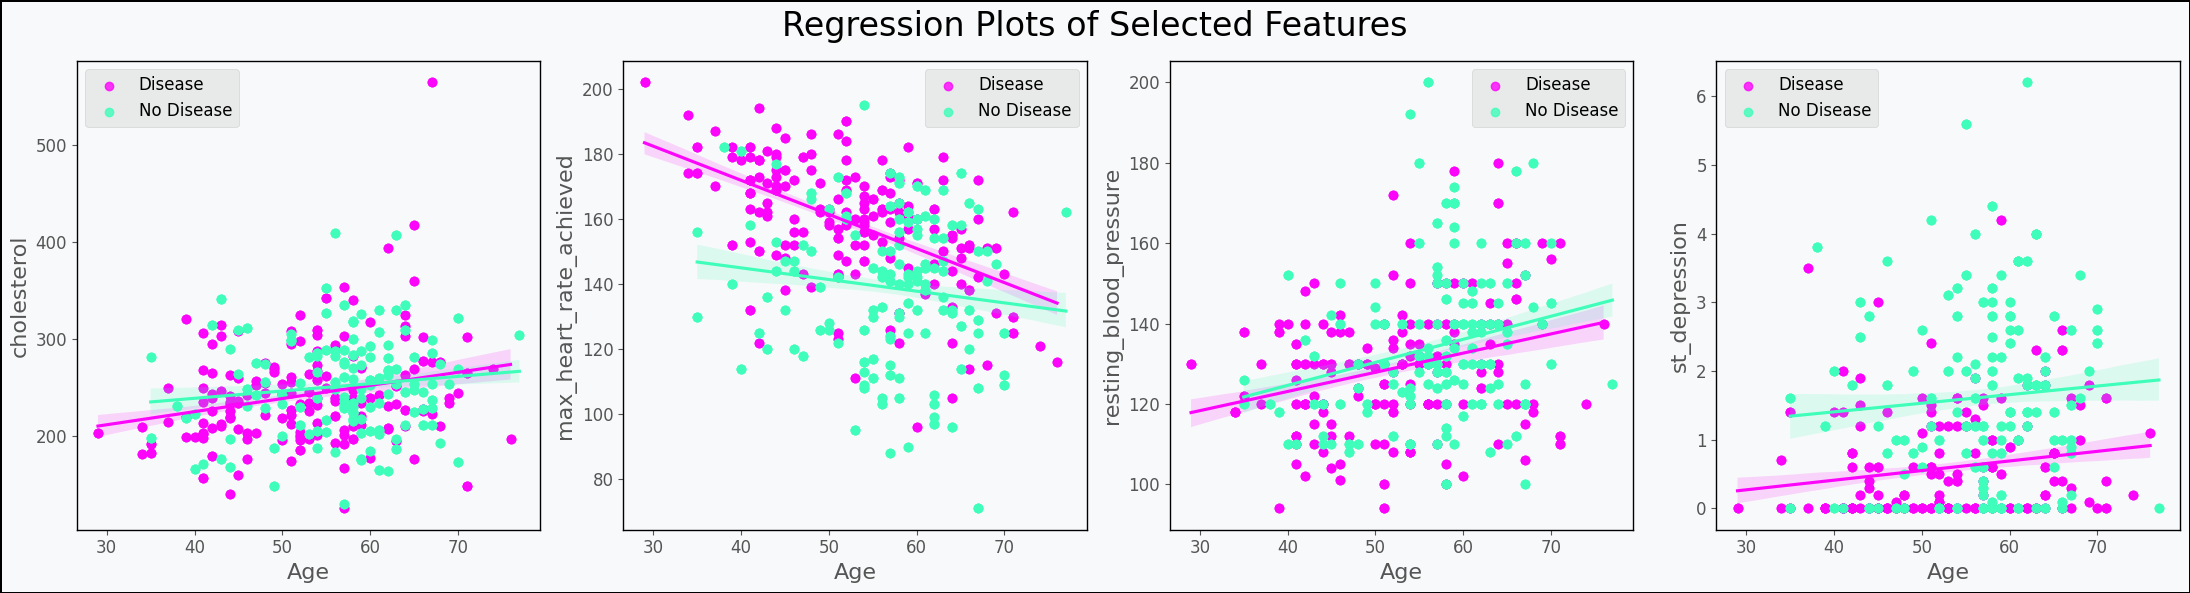

In [15]:
# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(22, 6), facecolor=background_color)

# Set background color for each axis
for a in ax:
    a.set_facecolor(background_color)

# Regression plots
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='cholesterol', ax=ax[0], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='cholesterol', ax=ax[0], color=mypal[5], label='No Disease')
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='max_heart_rate_achieved', ax=ax[1], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='max_heart_rate_achieved', ax=ax[1], color=mypal[5], label='No Disease')
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='resting_blood_pressure', ax=ax[2], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='resting_blood_pressure', ax=ax[2], color=mypal[5], label='No Disease')
sns.regplot(data=dataset[dataset['target'] == 1], x='age', y='st_depression', ax=ax[3], color=mypal[0], label='Disease')
sns.regplot(data=dataset[dataset['target'] == 0], x='age', y='st_depression', ax=ax[3], color=mypal[5], label='No Disease')

# Formatting
for a in ax:
    a.set_xlabel('Age', fontsize=16)
    a.set_ylabel(a.get_ylabel(), fontsize=16)
    a.tick_params(labelsize=12)
    a.legend(fontsize=12)
    a.grid(False)
    for spine in a.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Add border around the entire figure
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2)

# Set title
plt.suptitle('Regression Plots of Selected Features', fontsize=24)

# Save the plot
plt.tight_layout()
plt.show()

0

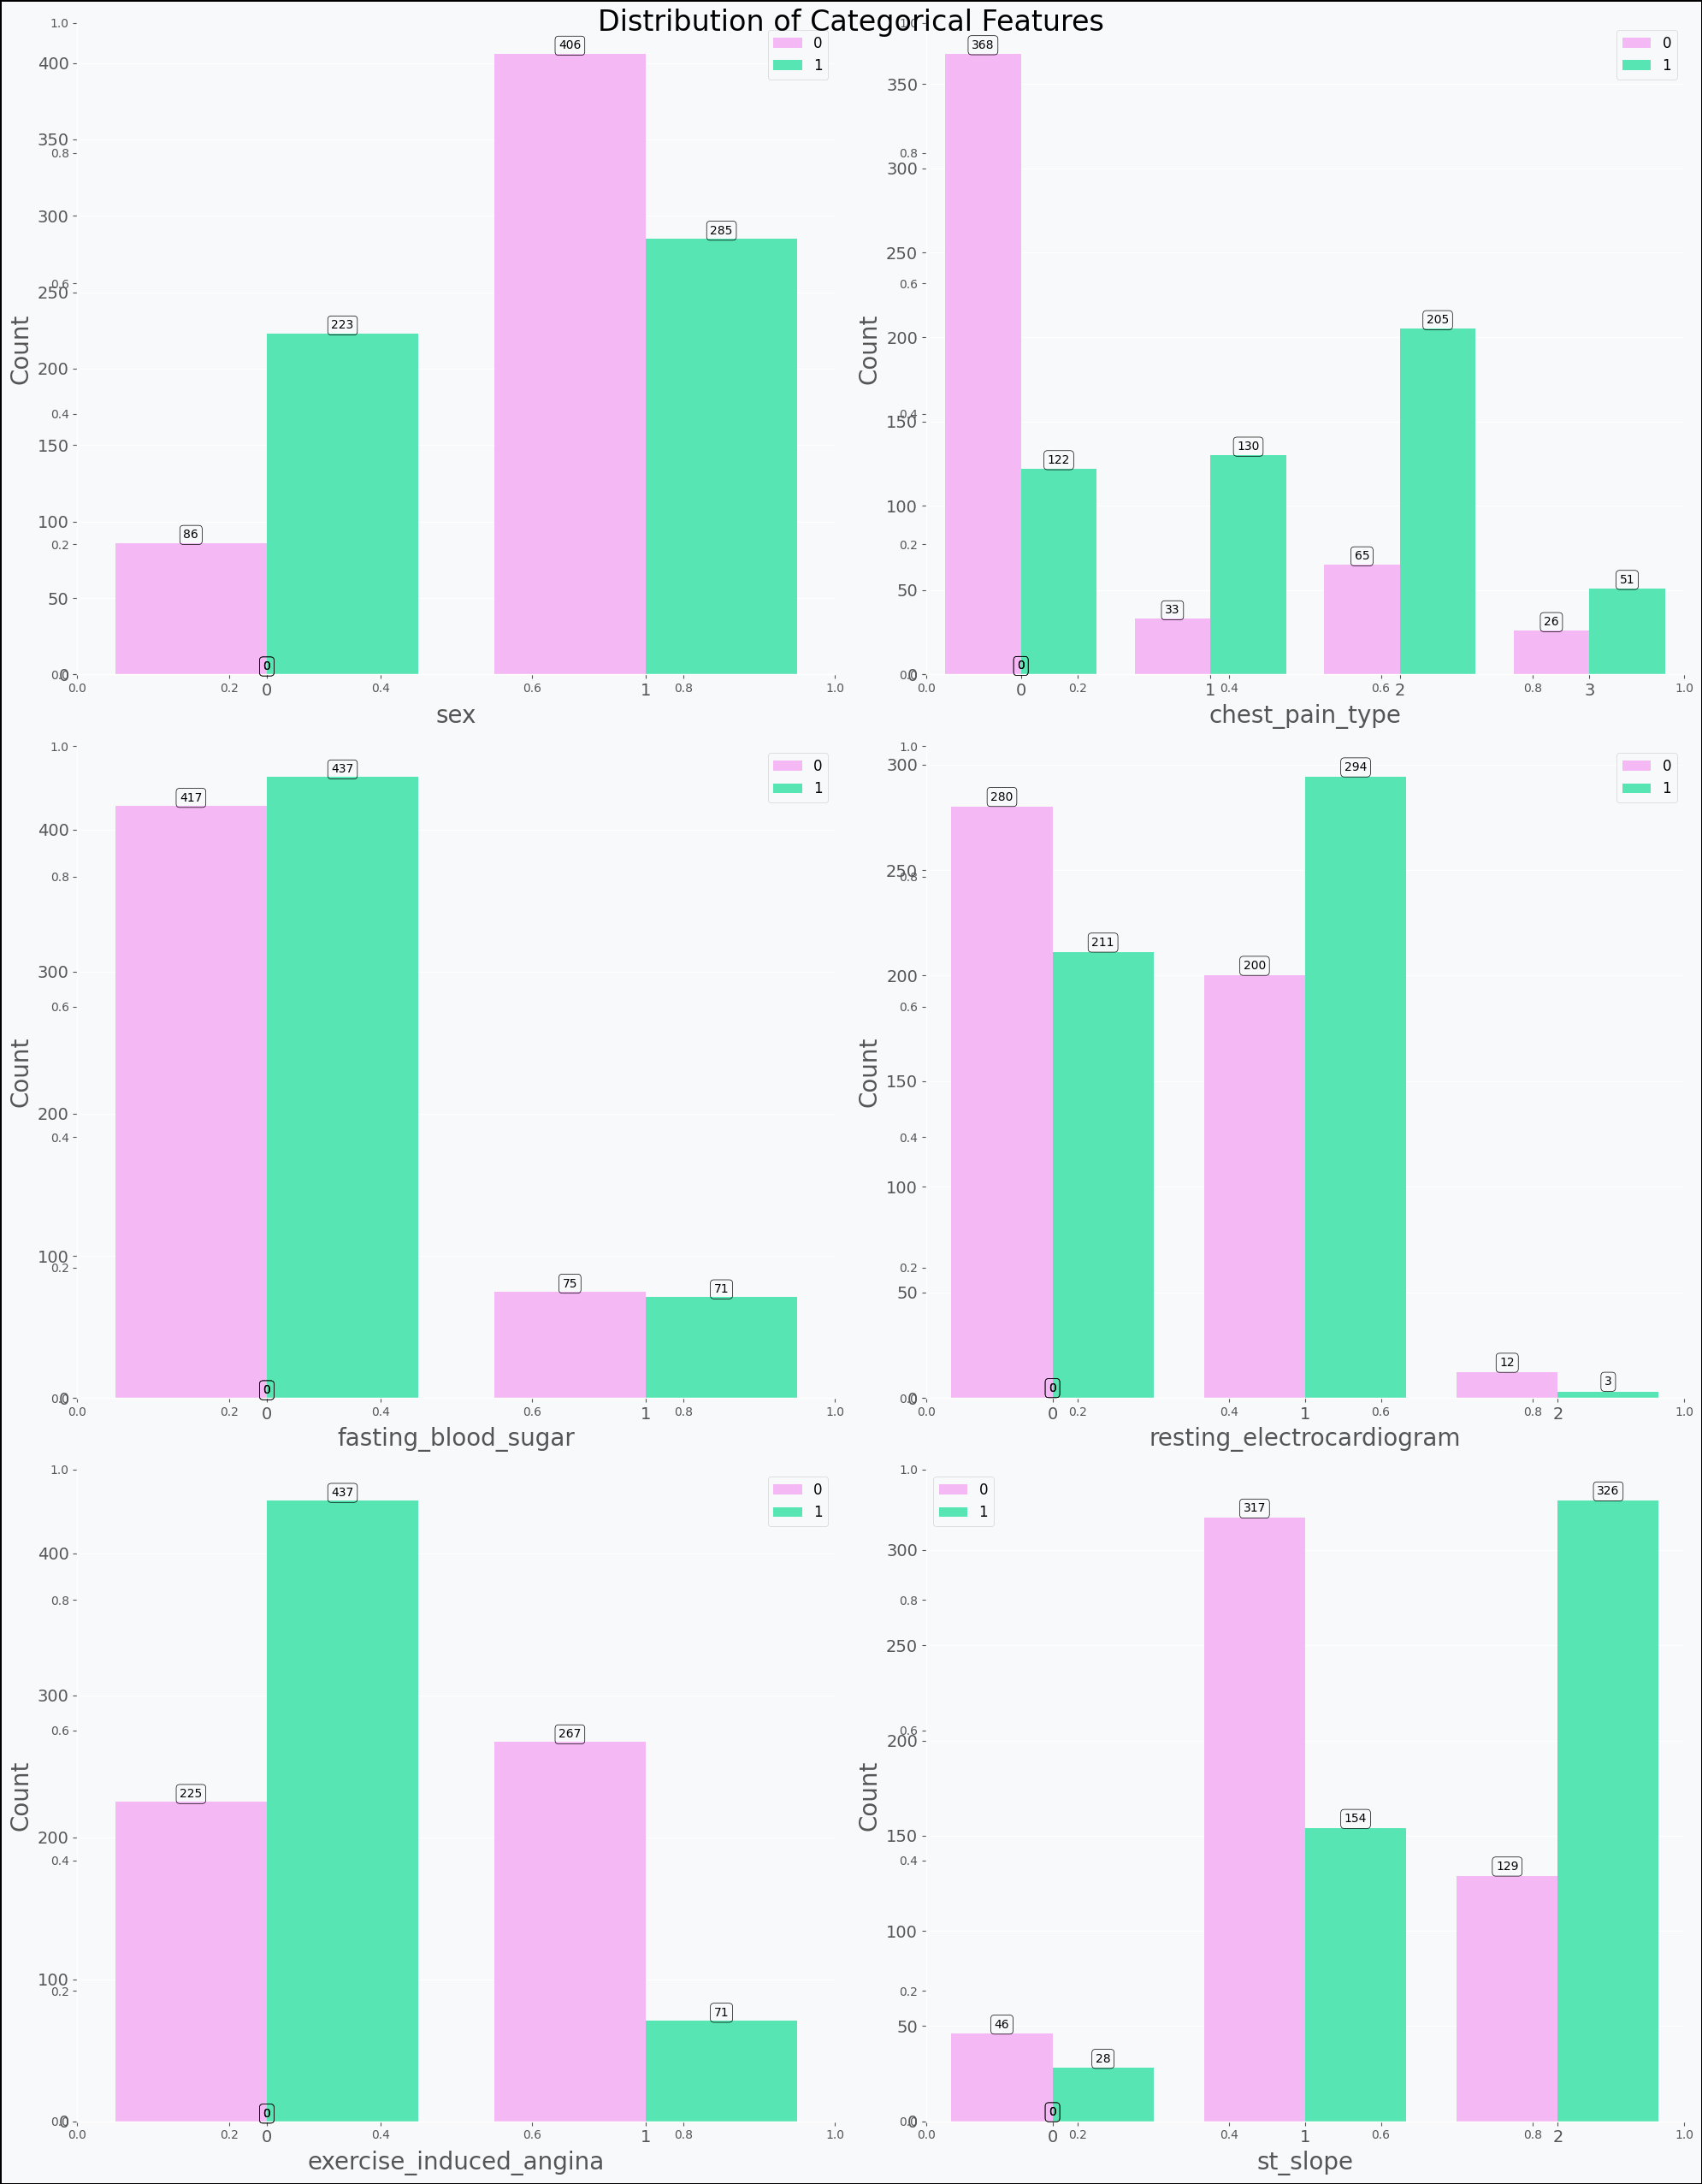

In [16]:
# Categorical features and summary

# count plot
def count_plot(dataset, cat_feats):
    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L/ncol))
    remove_last = (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol, figsize=(20, 26), facecolor=background_color)
    fig.subplots_adjust(top=0.92)
    
    # Add border around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    
    # Remove extra subplot
    if remove_last > 0:
        for i in range(remove_last):
            ax.flat[-(i+1)].set_visible(False)

    for i, col in enumerate(cat_feats):
        ax = fig.add_subplot(nrow, ncol, i+1, facecolor=background_color)
        sns.countplot(data=dataset, x=col, hue="target", palette=mypal[1::4], ax=ax)
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("Count", fontsize=20)
        ax.tick_params(labelsize=14)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        ax.legend(facecolor=background_color, fontsize=12)
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, 
                    '{:1.0f}'.format(height), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', 
                             boxstyle='round', linewidth=0.5))
    
    plt.suptitle('Distribution of Categorical Features', fontsize=24)
    plt.tight_layout()
    plt.savefig('count_plot_categorical_features.png', bbox_inches='tight')
    return 0

# Example call
cat_feats = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 
             'exercise_induced_angina', 'st_slope', 'thalassemia']
count_plot(dataset, cat_feats[0:-1])

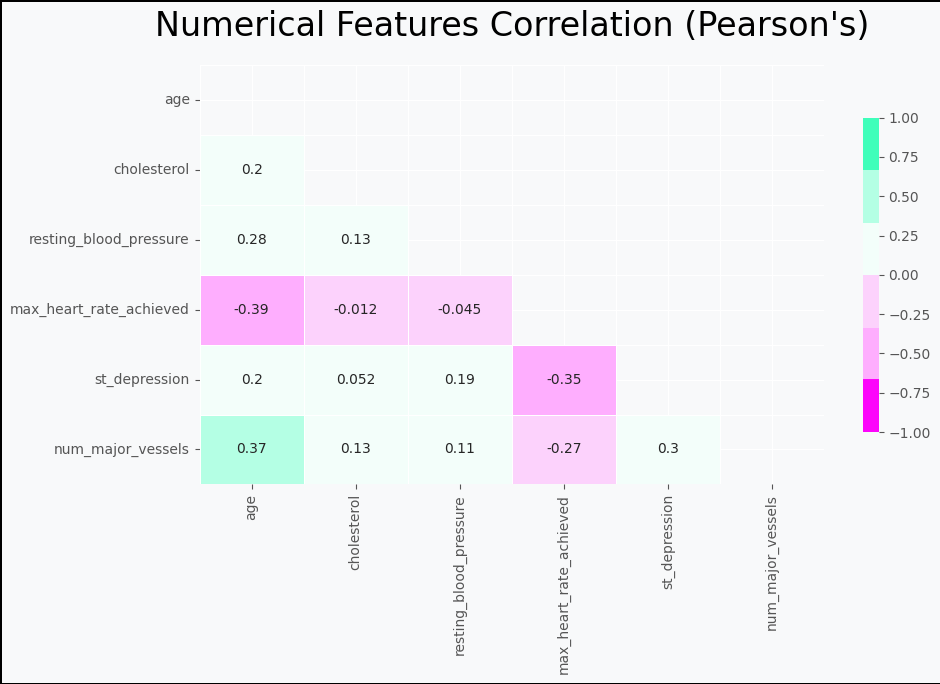

In [17]:
# correlation heatmaps
# pearson's correlation
# Numerical features
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 
             'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Subset dataset
df_ = dataset[num_feats]

# Calculate Pearson correlation
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 7), facecolor=background_color)
ax.set_facecolor(background_color)

# Add border around the entire figure
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2)

# Plot heatmap
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75}, ax=ax)

# Set title
ax.set_title("Numerical Features Correlation (Pearson's)", fontsize=24, y=1.05)

# Save the plot
plt.tight_layout()
plt.show()

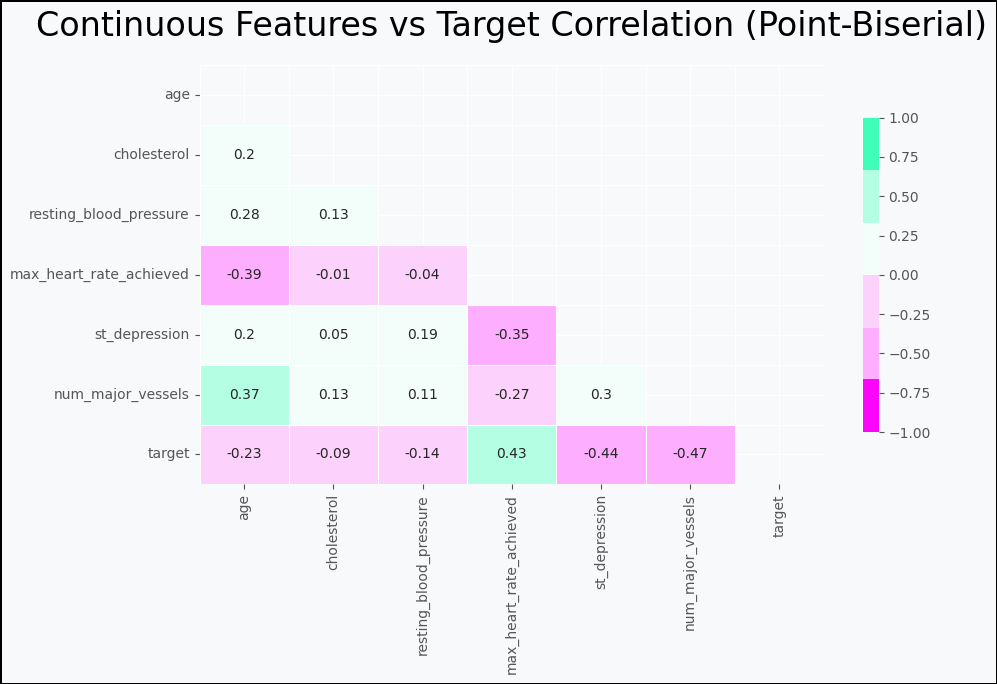

In [18]:
# Point biserial correlation
# Features
feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 
          'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

# Point-biserial correlation function
def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

# Calculate point-biserial correlations
rows = []
for x in feats_:
    col = []
    for y in feats_:
        pbs = point_biserial(dataset[x], dataset[y])
        col.append(round(pbs, 2))
    rows.append(col)

pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns=dataset[feats_].columns, index=dataset[feats_].columns)

# Mask upper triangle
mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 7), facecolor=background_color)
ax.set_facecolor(background_color)

# Add border around the entire figure
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2)

# Plot heatmap
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75}, ax=ax)

# Set title
ax.set_title("Continuous Features vs Target Correlation (Point-Biserial)", fontsize=24, y=1.05)

# Save the plot
plt.tight_layout()
plt.show()

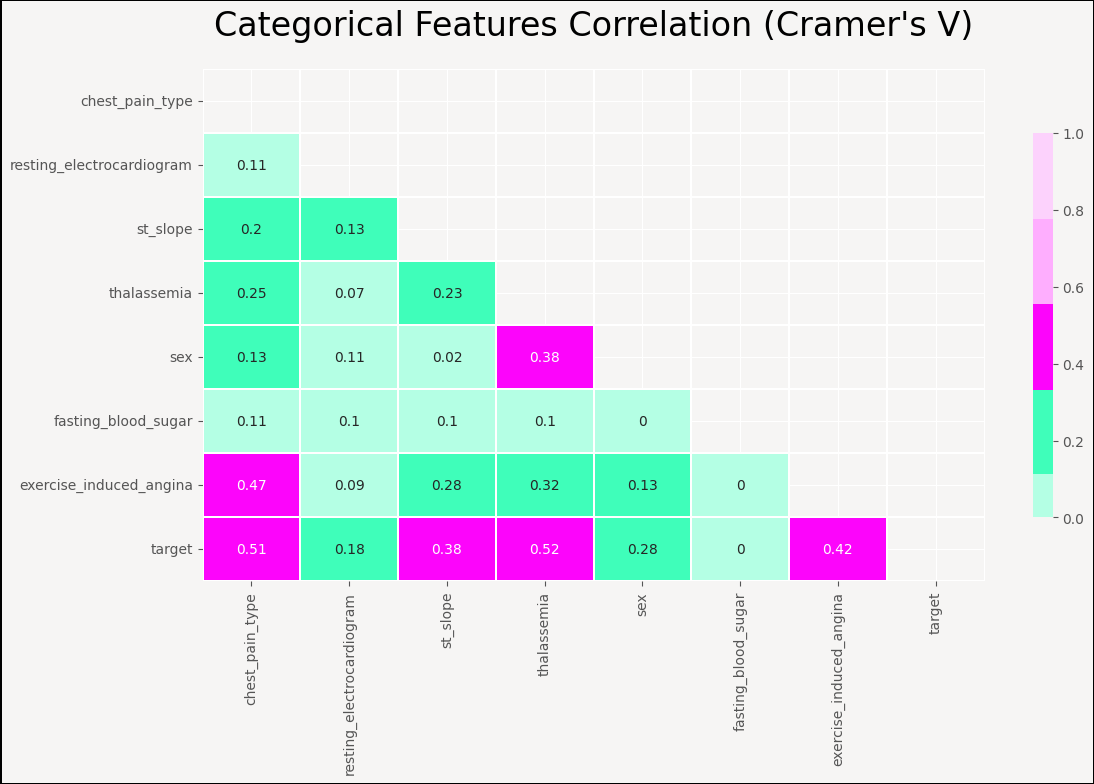

In [19]:
# cramer's V correlation
mypal_1 = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', 
           '#FC05FB', '#FEAEFE', '#FCD2FC']
background_color = '#F6F5F4'

# Cramer’s V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Define features in the expected order
ordered_feats = ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia', 
                 'sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
data_ = dataset[ordered_feats]

# Calculate Cramer’s V correlations
rows = []
for x in data_:
    col = []
    for y in data_:
        cramers = cramers_v(data_[x], data_[y])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_.columns, index=data_.columns)

# Mask upper triangle
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8), facecolor=background_color)
ax.set_facecolor(background_color)

# Add border around the entire figure
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2)

# Plot heatmap
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75}, ax=ax)

# Set title
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=24, y=1.05)

# Save the plot
plt.tight_layout()
plt.show()

Prediction


Scikit Learn Classifiers

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                           classification_report, recall_score, 
                           accuracy_score, roc_curve, auc)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder

In [27]:
import shap

In [28]:
def score_summary(names, classifiers, X_train, y_train, X_val, y_val):
    """
    Evaluates classifiers and returns performance metrics in a DataFrame.
    
    Args:
        names: List of classifier names
        classifiers: List of classifier objects
        X_train, y_train: Training data
        X_val, y_val: Validation data
        
    Returns:
        DataFrame with evaluation metrics
    """
    metrics = []
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_val, pred)
        fpr, tpr, _ = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        report = classification_report(y_val, pred, output_dict=True)
        
        metrics.append({
            'Classifier': name,
            'Accuracy': round(accuracy * 100, 2),
            'ROC_AUC': round(roc_auc, 2),
            'Recall': round(report['1']['recall'], 2),
            'Precision': round(report['1']['precision'], 2),
            'F1': round(report['1']['f1-score'], 2)
        })
    
    return pd.DataFrame(metrics)

In [22]:
def plot_conf_matrix(names, classifiers, X_train, y_train, X_val, y_val, figsize=(20, 15)):
    """
    Plots confusion matrices for multiple classifiers.
    
    Args:
        names: List of classifier names
        classifiers: List of classifier objects
        X_train, y_train: Training data
        X_val, y_val: Validation data
        figsize: Figure dimensions
    """
    n = len(classifiers)
    nrows = int(np.ceil(n / 2))
    ncols = min(2, n)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (name, clf) in enumerate(zip(names, classifiers)):
        clf.fit(X_train, y_train)
        ConfusionMatrixDisplay.from_estimator(
            clf, X_val, y_val,
            display_labels=['No Disease', 'Disease'],
            cmap='Blues', ax=axes[i]
        )
        axes[i].set_title(name)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.suptitle('Confusion Matrices for Classifiers', fontsize=24)
    plt.tight_layout()
    plt.show()

In [29]:
def roc_auc_curve(names, classifiers, X_train, y_train, X_val, y_val, figsize=(15, 10)):
    """
    Plots ROC curves for multiple classifiers.
    
    Args:
        names: List of classifier names
        classifiers: List of classifier objects
        X_train, y_train: Training data
        X_val, y_val: Validation data
        figsize: Figure dimensions
    """
    plt.figure(figsize=figsize)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [24]:
# Define categorical features (for reference, not used for encoding)
cat_feats = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 
             'exercise_induced_angina', 'st_slope', 'thalassemia']

# Split the data into train and validation sets
seed = 0
test_size = 0.25

features = dataset.columns[:-1]
X = dataset[features]
y = dataset['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=seed)

# Define classifier algorithms with adjusted parameters
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", max_iter=1000, random_state=seed),
    KNeighborsClassifier(5),  # Changed from 2 to 5
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(max_iter=1000, random_state=seed),  # Added max_iter
]

In [30]:
# Confirm setup
print("Running evaluation with", len(classifiers), "classifiers on dataset with shape:", dataset.shape)


Running evaluation with 12 classifiers on dataset with shape: (1000, 14)


In [31]:
# Calculate performance metrics
scores = score_summary(names, classifiers, X_train, y_train, X_val, y_val)
print("Classifier Performance Metrics:")
print(scores)

Classifier Performance Metrics:
             Classifier  Accuracy  ROC_AUC  Recall  Precision    F1
0   Logistic Regression      84.8     0.92    0.91       0.81  0.86
1     Nearest Neighbors      75.2     0.86    0.69       0.79  0.74
2       Support Vectors      68.0     0.73    0.69       0.68  0.69
3                Nu SVC      84.0     0.90    0.94       0.78  0.86
4         Decision Tree      98.8     0.99    0.98       1.00  0.99
5         Random Forest      98.8     1.00    0.98       1.00  0.99
6              AdaBoost      85.6     0.94    0.91       0.83  0.86
7     Gradient Boosting      98.0     1.00    0.99       0.97  0.98
8           Naive Bayes      79.6     0.90    0.83       0.78  0.80
9             Linear DA      83.6     0.91    0.91       0.80  0.85
10         Quadratic DA      84.4     0.92    0.87       0.83  0.85
11           Neural Net      84.4     0.91    0.92       0.80  0.86


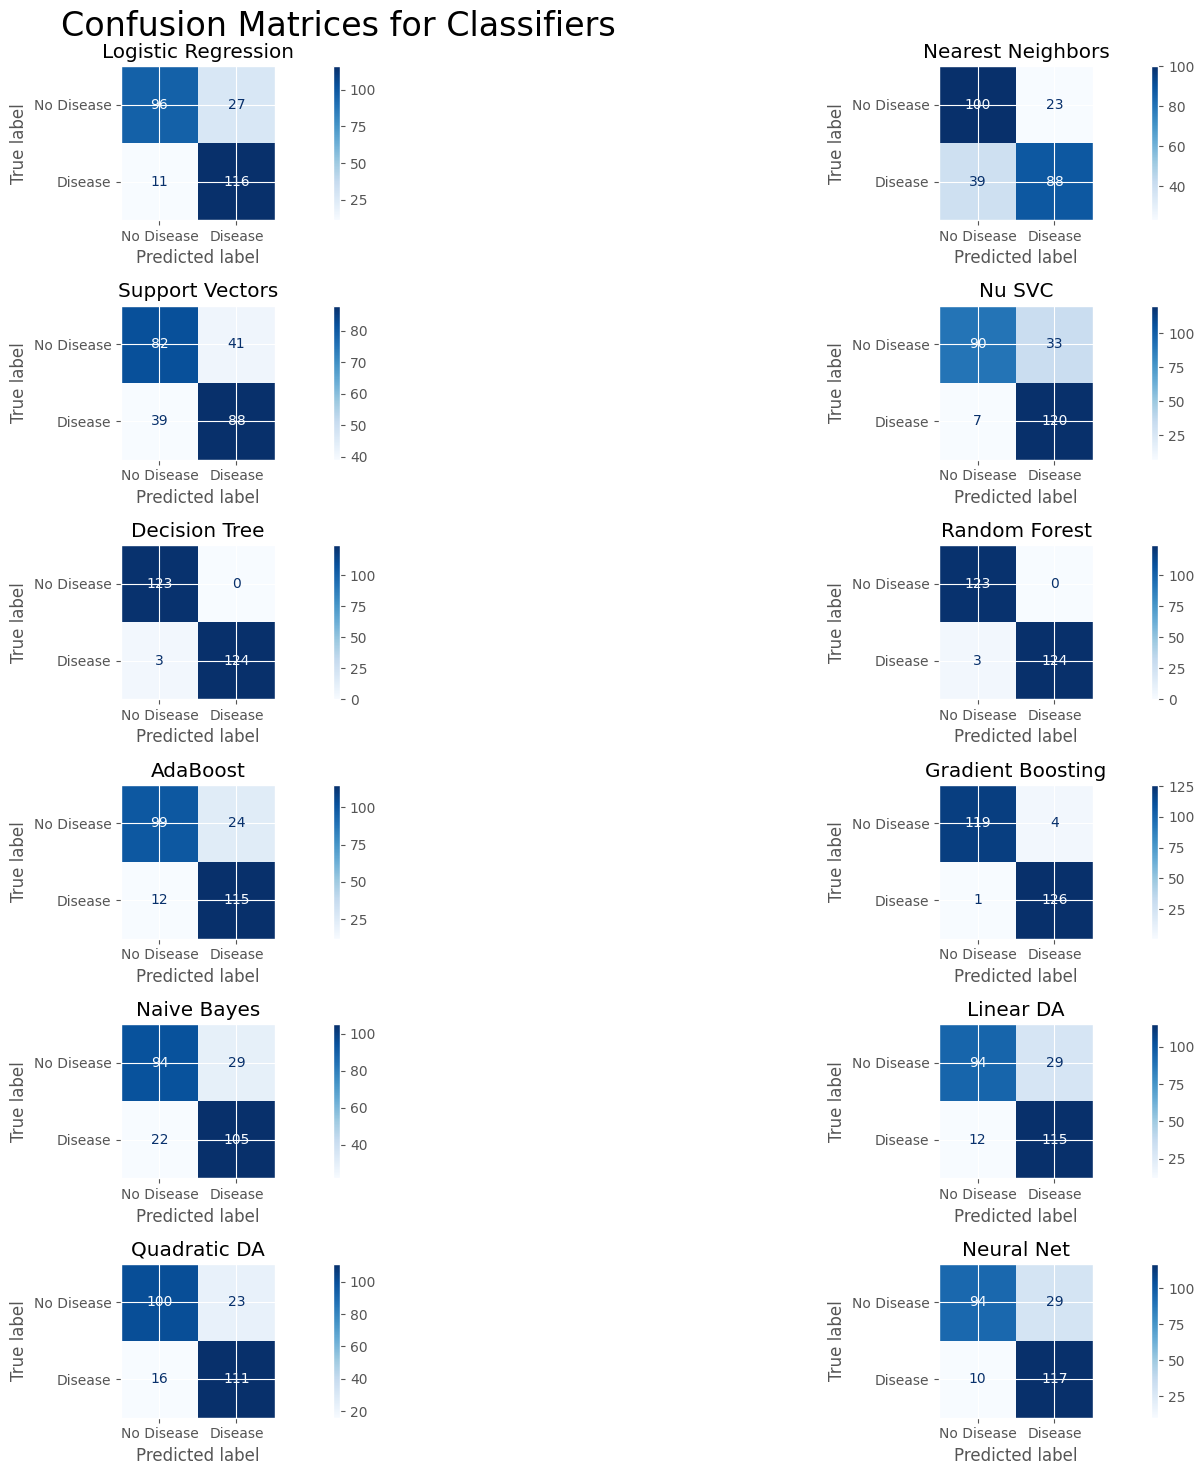

In [32]:
# Plot confusion matrices
plot_conf_matrix(names, classifiers, X_train, y_train, X_val, y_val)

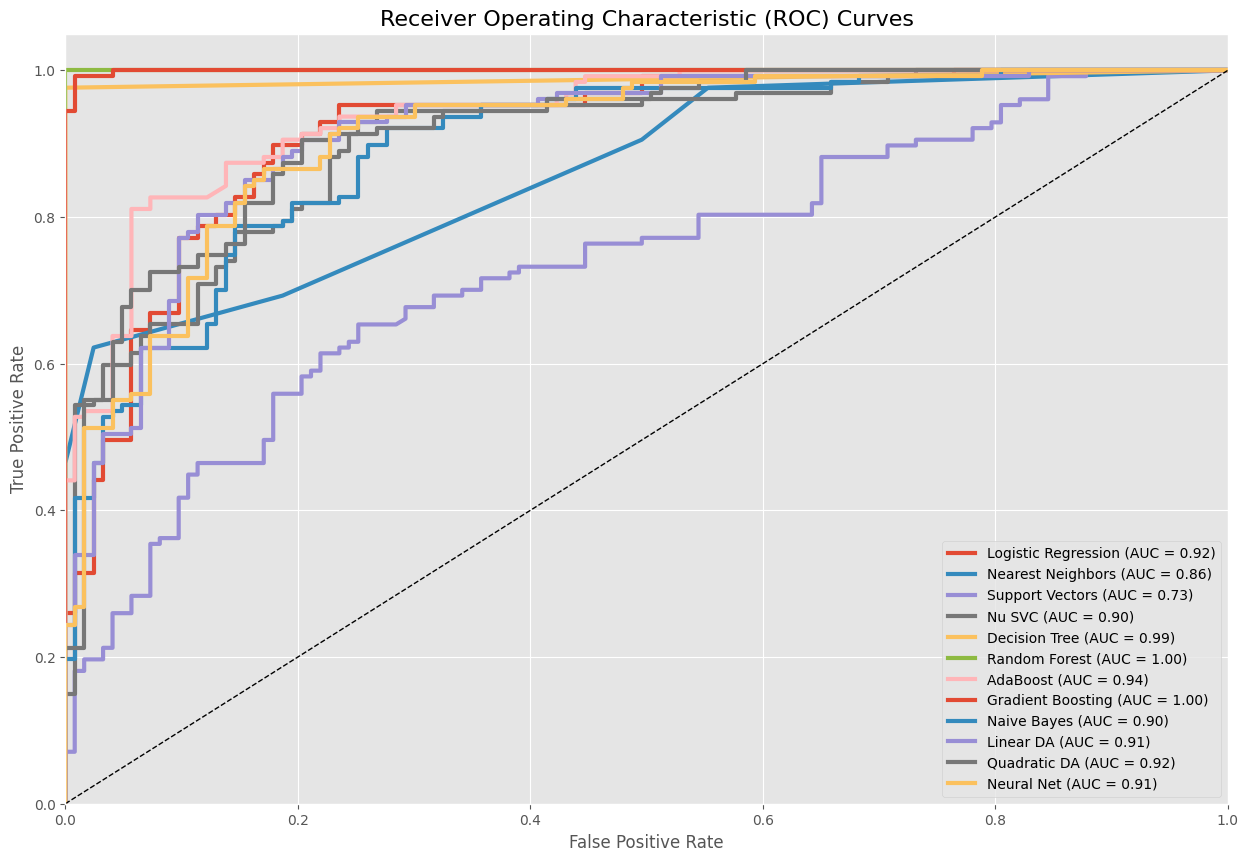

In [33]:
# Plot ROC curves
roc_auc_curve(names, classifiers, X_train, y_train, X_val, y_val)